In [449]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

#%% Change working directory from the workspace root to the ipynb file location. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
    os.chdir(r'C:\Users\kevin\Documents\Workspace\psylit-experiments')
    print("Changed cwd:", os.getcwd())
except:
    print("cwd:", os.getcwd())

from collections import *
from statistics import mean
from functools import *
from os import linesep as EOL
from itertools import *
import re

import spacy
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import plotly as py
py.offline.init_notebook_mode()
plt.rcParams['figure.figsize'] = 16,10
np.random.seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
Changed cwd: C:\Users\kevin\Documents\Workspace\psylit-experiments


In [297]:
ents = pd.read_csv(r'outputs\greatex_300k.edf.csv')
data = pd.read_csv(r'outputs\greatex_300k.df.csv')

rel_cols = list(data.columns[list(data.columns.str.startswith('R_'))])
lex_cols = list(data.columns[list(data.columns.str.startswith('L_'))])

In [298]:
#narrator = ents.categ == 'narrator'
#reader = ents.categ == 'reader'

#ents['entity_name'] = ents.entity_root

#ents.loc[narrator,'entity_name'] = 'NARRATOR'
#ents.loc[reader,'entity_name'] = 'READER'

#ents.loc[narrator,'categ'] = 'person'
#ents.loc[reader,'categ'] = 'person'

ents

Unnamed: 0        categ  entity_i entity_pos entity_root entity_tag  \
0              0  environment         0      PROPN      pirrip        NNP   
1              1  environment         0      PROPN      pirrip        NNP   
2              2  environment         0      PROPN      pirrip        NNP   
3              3       person         1      PROPN         pip        NNP   
4              4       person         1      PROPN         pip        NNP   
5              5       person         2       NOUN      father         NN   
6              6       person         2       NOUN      father         NN   
7              7       person         2       NOUN      father         NN   
8              8       person         2       NOUN      father         NN   
9              9       person         2       NOUN      father         NN   
10            10       person         3       NOUN      father         NN   
11            11       person         3       NOUN      father         NN   
12            12      unknown         4        DET       their       PRP$   
13            13      unknown         4        DET       their       PRP$   
14            14      unknown         4        DET       their       PRP$   
15            15      unknown         4        DET       their       PRP$   
16            16      unknown         4        DET       their       PRP$   
17            17      unknown         4        DET       their       PRP$   
18            18       person         5       NOUN         man         NN   
19            19       person         5       NOUN         man         NN   
20            20       person         5       NOUN         man         NN   
21            21       person         6       NOUN        head         NN   
22            22       person         6       NOUN        head         NN   
23            23       person         7       NOUN         sir         NN   
24            24       person         7       NOUN         sir         NN   
25            25       person         7       NOUN         sir         NN   
26            26       person         7       NOUN         sir         NN   
27            27       person         7       NOUN         sir         NN   
28            28       person         7       NOUN         sir         NN   
29            29       person         7       NOUN         sir         NN   
...          ...          ...       ...        ...         ...        ...   
5914        5914      unknown      1069       PRON        they        PRP   
5915        5915      unknown      1069       PRON        they        PRP   
5916        5916     narrator      1070       PRON          me        PRP   
5917        5917     narrator      1070       PRON          me        PRP   
5918        5918       person      1071       NOUN       light         NN   
5919        5919       person      1071       NOUN       light         NN   
5920        5920       person      1071       NOUN       light         NN   
5921        5921       person      1072       NOUN   clergyman         NN   
5922        5922       person      1072       NOUN   clergyman         NN   
5923        5923      unknown      1073       VERB        felt        VBN   
5924        5924      unknown      1073       VERB        felt        VBN   
5925        5925       person      1074       NOUN   creatures        NNS   
5926        5926       person      1074       NOUN   creatures        NNS   
5927        5927       person      1074       NOUN   creatures        NNS   
5928        5928       person      1075       PRON          he        PRP   
5929        5929       person      1075       PRON          he        PRP   
5930        5930  environment      1076       NOUN     grounds        NNS   
5931        5931  environment      1076       NOUN     grounds        NNS   
5932        5932  environment      1076       NOUN     grounds        NNS   
5933        5933  environment      1076       NOUN     grounds        NNS   
59

In [486]:
ent_counts = pd.concat([data[r] for r in rel_cols], axis='rows').dropna().value_counts()
subject = ent_counts.idxmax() # most common
ent_counts

joe             290
sister           97
wopsle           74
havisham         74
it               74
biddy            64
man              60
his              54
we               52
boy              38
estella          38
pumblechook      37
me               37
he               34
head             28
laws             28
she              26
myself           25
them             25
gentleman        24
her              24
jaggers          21
they             21
our              20
us               17
sergeant         17
sir              14
men              14
convict          13
pie              12
               ... 
pirate            1
curtain           1
education         1
bell              1
cards             1
back              1
lights            1
grounds           1
case              1
gates             1
station           1
hart              1
dash              1
party             1
constable         1
sign              1
advisers          1
fortune           1
ground            1


In [354]:
ents_lookup[narr_count.index]

me           NaN
myself       NaN
she       person
i            NaN
em        person
his       person
him       person
Name: ent_class, dtype: object

In [300]:
#ents.fillna(np.nan).groupby(['entity_root']).count()#[['entity_i']].count()
#ents_lookup = pd.DataFrame(index=ents.entity_root, columns=ents)
data.columns

Index(['Unnamed: 0', 'L_NRCw_Em_anger', 'L_NRCw_Em_anticipation',
       'L_NRCw_Em_disgust', 'L_NRCw_Em_fear', 'L_NRCw_Em_joy',
       'L_NRCw_Em_negative', 'L_NRCw_Em_positive', 'L_NRCw_Em_sadness',
       'L_NRCw_Em_surprise', 'L_NRCw_Em_trust', 'R_agent', 'R_patient',
       'R_possessive', 'i', 'lemma', 'neg', 't', 'text'],
      dtype='object')

In [357]:
ents[ents.categ == 'narrator']

Unnamed: 0     categ  entity_i entity_pos entity_root entity_tag  \
54            54  narrator        14       PRON          em        PRP   
55            55  narrator        14       PRON          em        PRP   
92            92  narrator        22       PRON          me        PRP   
93            93  narrator        22       PRON          me        PRP   
94            94  narrator        22       PRON          me        PRP   
165          165  narrator        33       PRON           i        PRP   
166          166  narrator        33       PRON           i        PRP   
167          167  narrator        33       PRON           i        PRP   
680          680  narrator        51       PRON          me        PRP   
681          681  narrator        51       PRON          me        PRP   
682          682  narrator        51       PRON          me        PRP   
738          738  narrator        71        DET         his       PRP$   
778          778  narrator        84       PRON      myself        PRP   
779          779  narrator        84       PRON      myself        PRP   
780          780  narrator        84       PRON      myself        PRP   
823          823  narrator        98       PRON          me        PRP   
824          824  narrator        98       PRON          me        PRP   
825          825  narrator        98       PRON          me        PRP   
826          826  narrator        98       PRON          me        PRP   
827          827  narrator        98       PRON          me        PRP   
828          828  narrator        98       PRON          me        PRP   
829          829  narrator        98       PRON          me        PRP   
925          925  narrator       109       PRON          me        PRP   
926          926  narrator       109       PRON          me        PRP   
1049        1049  narrator       132       PRON          me        PRP   
1050        1050  narrator       132       PRON          me        PRP   
1198        1198  narrator       159       PRON          me        PRP   
1199        1199  narrator       159       PRON          me        PRP   
1274        1274  narrator       172       PRON          me        PRP   
1275        1275  narrator       172       PRON          me        PRP   
...          ...       ...       ...        ...         ...        ...   
5001        5001  narrator       880       PRON          me        PRP   
5002        5002  narrator       880       PRON          me        PRP   
5255        5255  narrator       912       PRON      myself        PRP   
5256        5256  narrator       912       PRON      myself        PRP   
5305        5305  narrator       929       PRON          me        PRP   
5306        5306  narrator       929       PRON          me        PRP   
5328        5328  narrator       938       PRON          me        PRP   
5329        5329  narrator       938       PRON          me        PRP   
5330        5330  narrator       938       PRON          me        PRP   
5331        5331  narrator       938       PRON          me        PRP   
5336        5336  narrator       941       PRON      myself        PRP   
5337        5337  narrator       941       PRON      myself        PRP   
5338        5338  narrator       941       PRON      myself        PRP   
5339        5339  narrator       941       PRON      myself        PRP   
5386        5386  narrator       950       PRON          me        PRP   
5387        5387  narrator       950       PRON          me        PRP   
5388        5388  narrator       950       PRON          me        PRP   
5707        5707  narrator      1015       PRON          me        PRP   
5708        5708  narrator      1015       PRON          me        PRP   
5856        5856  narrator      1050       PRON          me        PRP   
5857        5857  narrator      1050       PRON          me        PRP   
5858        5858  narrator      1050       PRON          me        PRP   
5875      

In [387]:
def make_entity_lookup(ents, subject=None):
    ents_lookup = ents[['t0','entity_root', 'categ']].drop_duplicates()
    #ents_lookup.rename(index=str, columns={'entity_root': 'root', 'entity_name': 'name'}, inplace=True)
    #ents_lookup.set_index('entity_root', inplace=True, verify_integrity=True)
    
    is_narrator = ents_lookup.categ == 'narrator'
    is_reader = ents_lookup.categ == 'reader'

    if subject:
        is_subject = ents_lookup.entity_root == subject
    else:
        is_subject = is_narrator
        
    #ents_lookup.loc[narrator,'entity_root'] = 'NARRATOR'
    #ents_lookup.loc[reader,'entity_root'] = 'READER'

    ents_lookup.loc[is_narrator,'categ'] = 'person'
    ents_lookup.loc[is_reader,'categ'] = 'person'
    
    ents_lookup.loc[is_subject, 'categ'] = 'subject'
    
    most_likely_categ = lambda fr: fr.categ.value_counts(normalize=True, ascending=False, dropna=False).idxmax()
    ents_lookup = ents_lookup.groupby('entity_root').apply(most_likely_categ)
    ents_lookup.name = 'ent_class'
    #ents_lookup.at['NARRATOR']
    return ents_lookup

ents_lookup = make_entity_lookup(ents, subject=most_common_ent)
ents_lookup[ents_lookup.isin(['person','subject'])]

entity_root
accessories    person
advisers       person
assailant      person
aunt           person
back           person
bag            person
beard          person
beast          person
biddy          person
blacksmith     person
boy            person
boys           person
bride          person
bystanders     person
cards          person
carols         person
case           person
chair          person
child          person
children       person
clergyman      person
coach          person
company        person
convict        person
convicts       person
creature       person
creatures      person
dear           person
dike           person
dog            person
                ...  
she            person
sir            person
sister         person
skirts         person
soldier        person
soldiers       person
speaker        person
sponge         person
stars          person
stranger       person
subject        person
subjects       person
tailor         person
terror         perso

In [380]:
#ents_lookup.loc['NARRATOR']
q = ' | '.join(f"{c} == 'subject'" for c in rel_cols)
print(q)
data.query(q)

R_agent == 'subject' | R_patient == 'subject' | R_possessive == 'subject'


Unnamed: 0  L_NRCw_Em_anger  L_NRCw_Em_anticipation  L_NRCw_Em_disgust  \
4731        4731              0.0                     1.0                0.0   

      L_NRCw_Em_fear  L_NRCw_Em_joy  L_NRCw_Em_negative  L_NRCw_Em_positive  \
4731             0.0            0.0                 0.0                 0.0   

      L_NRCw_Em_sadness  L_NRCw_Em_surprise  L_NRCw_Em_trust R_agent  \
4731                0.0                 0.0              0.0     NaN   

     R_patient R_possessive      i  lemma    neg      t     text  
4731   subject          NaN  55162  think  False  55151  thought

In [381]:
def set_entity_class(data, ents_lookup):
    merged = data
    for col in rel_cols:
        rel = col[2:]
        print(f'merge on left:{col} ({rel}), right: {ents_lookup.index.name}')
        merged = merged.merge(ents_lookup, how='left', left_on=col, right_index=True, suffixes=('',f'__{rel}'))

    # fix first merge not applying suffix:
    merged.rename(index=str, columns={ents_lookup.name: f'{ents_lookup.name}__{rel_cols[0][2:]}'}, inplace=True)

    return merged

merged = set_entity_class(data, ents_lookup)
merged

merge on left:R_agent (agent), right: entity_root
merge on left:R_patient (patient), right: entity_root
merge on left:R_possessive (possessive), right: entity_root


Unnamed: 0  L_NRCw_Em_anger  L_NRCw_Em_anticipation  L_NRCw_Em_disgust  \
0              0              0.0                     0.0                0.0   
1              1              0.0                     1.0                0.0   
2              2              0.0                     0.0                0.0   
3              3              0.0                     0.0                0.0   
4              4              0.0                     1.0                0.0   
5              5              0.0                     0.0                0.0   
6              6              0.0                     1.0                0.0   
7              7              0.0                     1.0                0.0   
8              8              0.0                     1.0                0.0   
9              9              0.0                     0.0                0.0   
10            10              0.0                     1.0                0.0   
11            11              0.0                     0.0                0.0   
12            12              0.0                     0.0                0.0   
13            13              0.0                     0.0                0.0   
14            14              0.0                     0.0                0.0   
15            15              0.0                     1.0                0.0   
16            16              0.0                     0.0                1.0   
17            17              1.0                     0.0                0.0   
18            18              0.0                     1.0                0.0   
19            19              1.0                     0.0                0.0   
20            20              0.0                     0.0                0.0   
21            21              0.0                     0.0                0.0   
22            22              0.0                     0.0                0.0   
23            23              1.0                     0.0                0.0   
24            24              0.0                     0.0                0.0   
25            25              1.0                     0.0                0.0   
26            26              0.0                     0.0                0.0   
27            27              0.0                     0.0                0.0   
28            28              0.0                     0.0                0.0   
29            29              0.0                     1.0                0.0   
...          ...              ...                     ...                ...   
5926        5926              0.0                     0.0                0.0   
5927        5927              0.0                     0.0                0.0   
5928        5928              0.0                     0.0                0.0   
5929        5929              0.0                     0.0                0.0   
5930        5930              0.0                     1.0                0.0   
5931        5931              1.0                     0.0                1.0   
5932        5932              0.0                     0.0                0.0   
5933        5933              0.0                     0.0                0.0   
5934        5934              0.0                     0.0                0.0   
5935        5935              0.0                     0.0                0.0   
5936        5936              1.0                     0.0                1.0   
5937        5937              0.0                     0.0                0.0   
5938        5938              0.0                     0.0                0.0   
5939        5939              0.0                     0.0                0.0   
5940        5940              0.0                     0.0                0.0   
5941        5941              0.0                     0.0                0.0   
5942        5942              0.0                     1.0                0.0   
5943        5943              0.0                     0.0                0.0   
5944  

In [382]:
merged[merged.ent_class__agent == 'subject']

Unnamed: 0  L_NRCw_Em_anger  L_NRCw_Em_anticipation  L_NRCw_Em_disgust  \
239          239              0.0                     0.0                0.0   
261          261              0.0                     0.0                0.0   
267          267              0.0                     0.0                0.0   
322          322              0.0                     0.0                0.0   
326          326              1.0                     1.0                1.0   
327          327              0.0                     0.0                0.0   
338          338              0.0                     0.0                0.0   
350          350              0.0                     0.0                0.0   
372          372              0.0                     0.0                0.0   
381          381              0.0                     0.0                0.0   
391          391              0.0                     0.0                0.0   
394          394              1.0                     0.0                0.0   
395          395              0.0                     0.0                0.0   
410          410              0.0                     0.0                0.0   
414          414              0.0                     0.0                0.0   
416          416              0.0                     0.0                0.0   
433          433              1.0                     0.0                0.0   
436          436              1.0                     0.0                0.0   
452          452              0.0                     1.0                0.0   
454          454              0.0                     0.0                0.0   
488          488              0.0                     0.0                0.0   
506          506              0.0                     0.0                0.0   
509          509              0.0                     0.0                0.0   
512          512              0.0                     0.0                0.0   
859          859              0.0                     0.0                0.0   
881          881              0.0                     0.0                0.0   
886          886              0.0                     0.0                0.0   
890          890              0.0                     0.0                1.0   
891          891              0.0                     0.0                0.0   
894          894              0.0                     1.0                0.0   
...          ...              ...                     ...                ...   
4615        4615              0.0                     1.0                0.0   
4776        4776              0.0                     1.0                0.0   
4795        4795              0.0                     0.0                0.0   
4851        4851              0.0                     0.0                0.0   
4852        4852              0.0                     1.0                0.0   
4919        4919              0.0                     0.0                0.0   
5139        5139              0.0                     1.0                0.0   
5532        5532              0.0                     0.0                0.0   
5663        5663              1.0                     0.0                0.0   
5664        5664              1.0                     0.0                0.0   
5666        5666              0.0                     1.0                0.0   
5694        5694              0.0                     1.0                0.0   
5707        5707              0.0                     0.0                0.0   
5717        5717              0.0                     0.0                0.0   
5718        5718              1.0                     0.0                0.0   
5727        5727              0.0                     0.0                0.0   
5736        5736              0.0                     0.0                0.0   
5766        5766              0.0                     0.0                0.0   
5783  

In [383]:
def cascade_representation(data, dummies_cols, token_cols, casc_index=['t']):
    dum_cascades = pd.get_dummies(data[dummies_cols], dummy_na=False, prefix_sep='+')
    dum_cascades.rename(mapper=lambda c: '_'.join(c.split('__')[1].split('+')), axis='columns', inplace=True)
    dum_casc_cols = list(dum_cascades.columns)
    
    tok_cascades = (data[token_cols] > data[token_cols].mean()) * 1
    casc = pd.concat([data[casc_index], dum_cascades, tok_cascades], axis='columns')
    casc = casc.groupby(casc_index).any()*1
    return casc


ent_cols = list(merged.columns[list(merged.columns.str.contains('__'))])
keep = (~merged[ent_cols].isna()).any(axis='columns') & ~merged.neg
df = cascade_representation(
    merged[keep][['t','neg']+ent_cols+rel_cols+lex_cols],
    dummies_cols=ent_cols,
    token_cols=lex_cols)
df

agent_environment  agent_person  agent_subject  agent_unknown  \
t                                                                      
48                     1             0              0              0   
75                     0             1              0              0   
121                    0             0              0              0   
183                    0             0              0              1   
546                    0             1              0              0   
688                    0             0              0              0   
706                    0             0              0              0   
770                    0             0              0              0   
806                    0             0              0              0   
908                    0             1              0              0   
967                    0             1              0              0   
992                    0             0              0              0   
1058                   0             1              0              0   
1234                   0             1              0              0   
1367                   1             0              0              0   
1446                   0             0              0              0   
1537                   0             0              0              0   
1593                   0             1              0              0   
1610                   0             1              0              0   
1770                   0             1              0              0   
1843                   0             1              0              0   
1872                   0             1              0              0   
1989                   0             1              0              0   
2105                   0             0              0              0   
2176                   0             1              0              0   
2208                   1             0              0              0   
2276                   0             1              0              0   
2310                   0             0              0              0   
2368                   0             1              0              0   
2397                   0             0              1              1   
...                  ...           ...            ...            ...   
67094                  0             0              1              0   
67205                  0             1              0              0   
67232                  0             1              0              0   
67262                  0             0              1              0   
67366                  0             0              0              0   
67631                  0             0              1              0   
67756                  0             0              0              0   
67798                  0             0              0              0   
67895                  0             0              0              0   
67955                  0             0              0              0   
68011                  1             0              0              0   
68108                  0             0              0              1   
68216                  0             0              0              0   
68318                  0             0              0              0   
68376                  0             0              1              0   
68434                  0             1              0              0   
68478                  0             0              1              0   
68503                  0             0              0              0   
68556                  0             0              0              0   
68662                  0             1              0              0   
68723                  1             0              0              0   
68819                  0             0              1              0   
68855                  0             0         

In [ ]:
# old version: outside function
keep = (~merged[ent_cols].isna()).any(axis='columns') & ~merged.neg
df = merged[keep][['t','neg']+ent_cols+rel_cols+lex_cols]

lex_cascades = (df[lex_cols] > df[lex_cols].mean()) * 1
ent_cascades = pd.get_dummies(df[ent_cols], dummy_na=False, prefix_sep='+')
ent_cascades.rename(mapper=lambda c: '_'.join(c.split('__')[1].split('+')), axis='columns', inplace=True)
ent_casc_cols = list(ent_cascades.columns)
casc = pd.concat([df[['t']], ent_cascades, lex_cascades], axis='columns')
casc = casc.groupby('t').any()*1
casc

In [384]:
import plotly as py
import plotly.graph_objs as go

def get_traces(casc):
    for ecol in ent_casc_cols:
        mask = casc[lex_cols][casc[ecol] == 1] == 1
        mask_idx = mask.index[mask[c]]
        trace_data = [(c, mask_idx) for c in lex_cols]
        #trace_data = np.array([[v.to_numpy(), [k]*len(v)] for k, v in trace_data.items()])
        #print(trace_data.shape)
        #return trace_data
        x = np.concatenate([idx.to_numpy() for c, idx in trace_data])
        y = np.concatenate([[c]*len(idx)   for c, idx in trace_data])
        yield go.Scattergl({
            "x": x,
            "y": y, 
            "marker": {"opacity": 0.75}, 
            "hoverinfo": "text",
            "text": txt,
            "mode": "markers", 
            "name": ecol, 
            "type": "scatter"
        })
        
traces = list(get_traces(casc))
layout = {"title": "", 
          "xaxis": {"title": "", }, 
          "yaxis": {"title": ""}}

fig = go.Figure(data=traces)
py.offline.iplot(fig)

In [163]:
casc.loc[casc['agent_person'] == 1, lc]

L_NRCw_Em_anger  L_NRCw_Em_anticipation  L_NRCw_Em_disgust  \
t                                                                   
75                   0                       1                  0   
546                  1                       1                  0   
908                  0                       1                  0   
967                  0                       1                  0   
1058                 1                       0                  0   
1234                 0                       0                  0   
1593                 0                       1                  0   
1610                 0                       0                  0   
1770                 0                       0                  0   
1843                 0                       0                  0   
1872                 0                       0                  0   
1989                 0                       0                  0   
2176                 0                       0                  0   
2276                 0                       0                  0   
2368                 0                       1                  0   
2397                 0                       1                  0   
2512                 0                       0                  0   
2553                 1                       0                  1   
2577                 0                       0                  0   
2618                 0                       0                  0   
2670                 0                       0                  0   
2980                 0                       1                  0   
3344                 0                       0                  0   
3470                 1                       1                  1   
3505                 1                       0                  1   
3524                 0                       0                  0   
3616                 0                       0                  0   
3712                 0                       0                  0   
3817                 0                       0                  0   
3872                 0                       1                  0   
...                ...                     ...                ...   
65100                0                       0                  0   
65314                1                       1                  1   
65595                0                       1                  0   
65720                0                       1                  0   
65860                1                       0                  0   
65865                1                       0                  0   
65888                0                       1                  0   
66073                1                       0                  1   
66097                0                       1                  0   
66254                0                       0                  0   
66341                1                       0                  0   
66538                0                       0                  0   
66570                0                       0                  0   
66725                0                       0                  0   
67094                0                       0                  0   
67205                0                       0                  0   
67232                0                       0                  0   
67262                0                       0                  0   
67631                1                       1                  1   
68376                0                       0                  0   
68434                0                       1                  0   
68478                0                       0                  0   
68662                0                       1                  0   
68819                0                       0                  0   
69000                0                       0                  0   
69017

In [396]:
from scipy.stats import ttest_ind
    
ttest_ind(
    casc.loc[casc['patient_subject'] == 1, lex_cols],
    casc[lex_cols].mean(),
    #casc.loc[casc['agent_person'] == 1, lex_cols],
)

Ttest_indResult(statistic=array([ 0.13355952,  0.13355952, -0.51853739,  0.83270637, -0.34073664,
        2.53738786,  0.55927305,  0.55927305, -0.01702235,  0.6963848 ]), pvalue=array([0.89426645, 0.89426645, 0.60628304, 0.40881862, 0.73467469,
       0.01420598, 0.57837635, 0.57837635, 0.98648393, 0.48928913]))

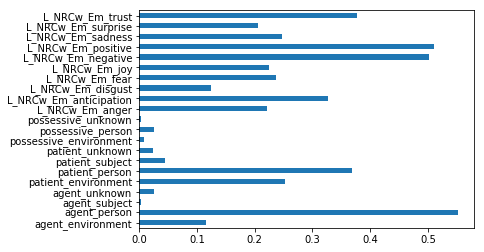

In [401]:
casc.mean().plot(kind='barh')

In [395]:
casc.loc[casc['patient_subject'] == 1, lex_cols].mean()

L_NRCw_Em_anger           0.318182
L_NRCw_Em_anticipation    0.318182
L_NRCw_Em_disgust         0.227273
L_NRCw_Em_fear            0.431818
L_NRCw_Em_joy             0.250000
L_NRCw_Em_negative        0.681818
L_NRCw_Em_positive        0.386364
L_NRCw_Em_sadness         0.386364
L_NRCw_Em_surprise        0.295455
L_NRCw_Em_trust           0.409091
dtype: float64

In [489]:
def pair_cascades(casc, sources, destinations, sep=' & '):
    pairs = product(sources, destinations)
    return pd.DataFrame({
        f"{s}{sep}{d}": casc[s] * casc[d]
        for s, d in pairs})

col_startswith = lambda df, pattern: list(df.columns[df.columns.str.startswith(pattern)])
higher_casc = pair_cascades(casc,
                            col_startswith(casc, ('agent','patient')),
                            col_startswith(casc, 'L_'))
higher_casc

agent_environment & L_NRCw_Em_anger  \
t                                            
48                                       0   
75                                       0   
121                                      0   
183                                      0   
546                                      0   
688                                      0   
706                                      0   
770                                      0   
806                                      0   
908                                      0   
967                                      0   
992                                      0   
1058                                     0   
1234                                     0   
1367                                     0   
1446                                     0   
1537                                     0   
1593                                     0   
1610                                     0   
1770                                     0   
1843                                     0   
1872                                     0   
1989                                     0   
2105                                     0   
2176                                     0   
2208                                     0   
2276                                     0   
2310                                     0   
2368                                     0   
2397                                     0   
...                                    ...   
67094                                    0   
67205                                    0   
67232                                    0   
67262                                    0   
67366                                    0   
67631                                    0   
67756                                    0   
67798                                    0   
67895                                    0   
67955                                    0   
68011                                    0   
68108                                    0   
68216                                    0   
68318                                    0   
68376                                    0   
68434                                    0   
68478                                    0   
68503                                    0   
68556                                    0   
68662                                    0   
68723                                    0   
68819                                    0   
68855                                    0   
69000                                    0   
69017                                    0   
69118                                    0   
69259                                    0   
69283                                    0   
69344                                    0   
69400                                    0   

       agent_environment & L_NRCw_Em_anticipation  \
t                                                   
48                                              0   
75                                              0   
121                                             0   
183                                             0   
546                                             0   
688                                             0   
706                                             0   
770                                             0   
806                                             0   
908                                             0   
967                                             0   
992                                             0   
1058                                            0   
1234                                            0   
1367                                            0   
1446                                            0   
1537                                            0   
1593                                            0   
1610                                            

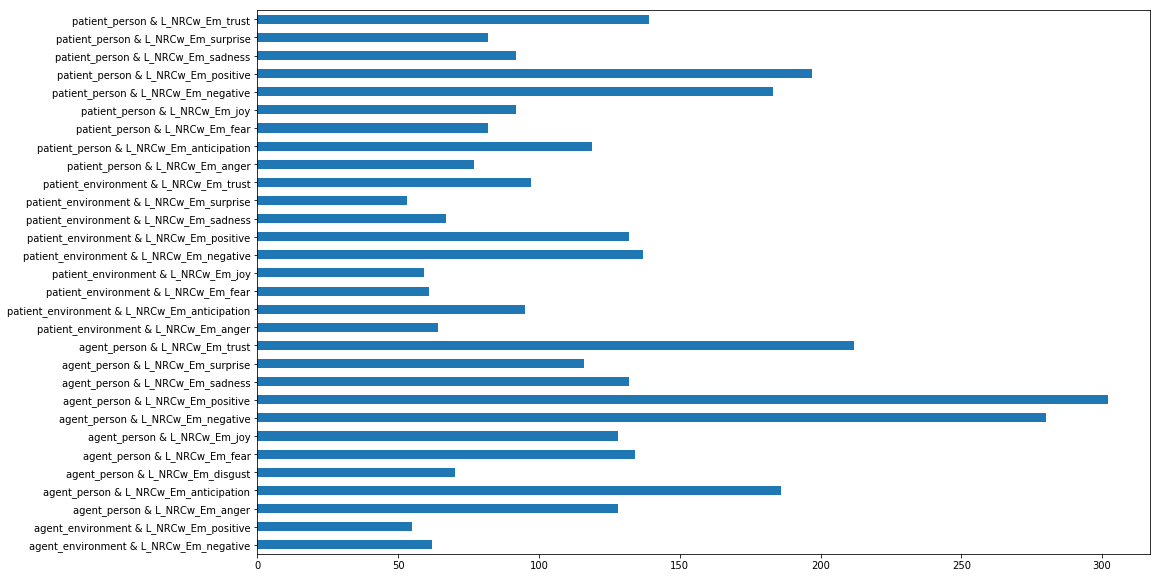

In [497]:
#higher_casc.sum().plot(kind='barh')
higher_casc = higher_casc.loc[:, higher_casc.sum() > 50]
higher_casc.sum().plot(kind='barh')

In [505]:
from pyinform import transferentropy as te

def transfer_entropies(casc, source_cols, destination_cols, **kwargs):
    #n, m = len(source_cols), len(destination_cols)
    #mat = np.ones([n,m]) * np.nan
    #cols = product(enumerate(source_cols), enumerate(destination_cols))
    rows = []
    for i, sc in enumerate(source_cols):
        rows.append({'source': sc, 
                     **{dc:te.transfer_entropy(casc[sc], casc[dc], **kwargs) for dc in destination_cols }})
    df = pd.DataFrame(rows)
    df.set_index('source', inplace=True, verify_integrity=True)
    return df

#src_cols = (list(casc.columns[casc.columns.str.startswith('L_')]) +
#            list(casc.columns[casc.columns.str.startswith('agent_')]))
#dst_cols = list(casc.columns[casc.columns.str.startswith('patient_')])
all_cols = list(higher_casc.columns)
k = 10
T = transfer_entropies(higher_casc, all_cols, all_cols, k=k)
T

agent_environment & L_NRCw_Em_negative  \
source                                                                                 
agent_environment & L_NRCw_Em_negative                                 -4.440892e-16   
agent_environment & L_NRCw_Em_positive                                  6.191828e-03   
agent_person & L_NRCw_Em_anger                                          1.179905e-02   
agent_person & L_NRCw_Em_anticipation                                   5.329809e-03   
agent_person & L_NRCw_Em_disgust                                        3.072995e-03   
agent_person & L_NRCw_Em_fear                                           1.109917e-02   
agent_person & L_NRCw_Em_joy                                            6.956539e-03   
agent_person & L_NRCw_Em_negative                                       1.658940e-02   
agent_person & L_NRCw_Em_positive                                       9.541745e-03   
agent_person & L_NRCw_Em_sadness                                        1.156663e-02   
agent_person & L_NRCw_Em_surprise                                       2.834415e-03   
agent_person & L_NRCw_Em_trust                                          1.569144e-02   
patient_environment & L_NRCw_Em_anger                                   6.954743e-03   
patient_environment & L_NRCw_Em_anticipation                            5.548794e-03   
patient_environment & L_NRCw_Em_fear                                    1.086023e-02   
patient_environment & L_NRCw_Em_joy                                     8.086555e-03   
patient_environment & L_NRCw_Em_negative                                1.449408e-02   
patient_environment & L_NRCw_Em_positive                                1.002379e-02   
patient_environment & L_NRCw_Em_sadness                                 1.419568e-02   
patient_environment & L_NRCw_Em_surprise                                5.198200e-03   
patient_environment & L_NRCw_Em_trust                                   6.399167e-03   
patient_person & L_NRCw_Em_anger                                        1.900841e-03   
patient_person & L_NRCw_Em_anticipation                                 5.857731e-03   
patient_person & L_NRCw_Em_fear                                         3.087961e-03   
patient_person & L_NRCw_Em_joy                                          3.315830e-03   
patient_person & L_NRCw_Em_negative                                     5.302410e-03   
patient_person & L_NRCw_Em_positive                                     2.500965e-03   
patient_person & L_NRCw_Em_sadness                                      2.650177e-03   
patient_person & L_NRCw_Em_surprise                                     3.354027e-03   
patient_person & L_NRCw_Em_trust                                        3.382438e-03   

                                              agent_environment & L_NRCw_Em_positive  \
source                                                                                 
agent_environment & L_NRCw_Em_negative                                  1.638337e-02   
agent_environment & L_NRCw_Em_positive                                 -4.440892e-16   
agent_person & L_NRCw_Em_anger                                          8.385146e-03   
agent_person & L_NRCw_Em_anticipation                                   1.643641e-02   
agent_person & L_NRCw_Em_disgust                                        2.262123e-03   
agent_person & L_NRCw_Em_fear                                           3.849333e-03   
agent_person & L_NRCw_Em_joy                                            1.280616e-02   
agent_person & L_NRCw_Em_negative                                       1.505564e-02   
agent_person & L_NRCw_Em_positive                                       1.240772e-02   
agent_person & L_NRCw_Em_sadness                                        1.083136e-02   
agent_person & L_NRCw_Em_surprise                                       3.909905e-03   
agent_person & L_NRCw_Em_trust                                          1.113007e-02 

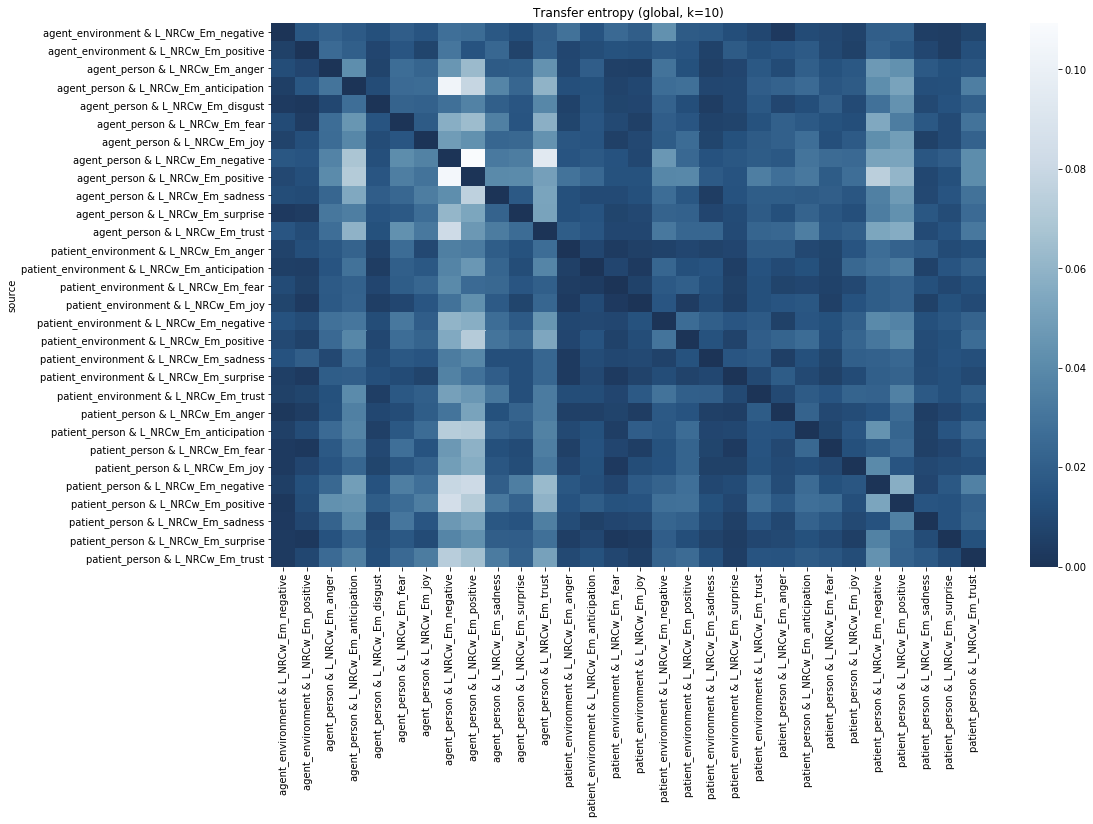

In [506]:
import plotly.figure_factory as ff
#x = te_1.index
#y = te_1.destination

#fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text)#, colorscale='Viridis')
sns.heatmap(T, annot=False, cmap=seq_cmap)
plt.title(f"Transfer entropy (global, k={k})")
plt.show()

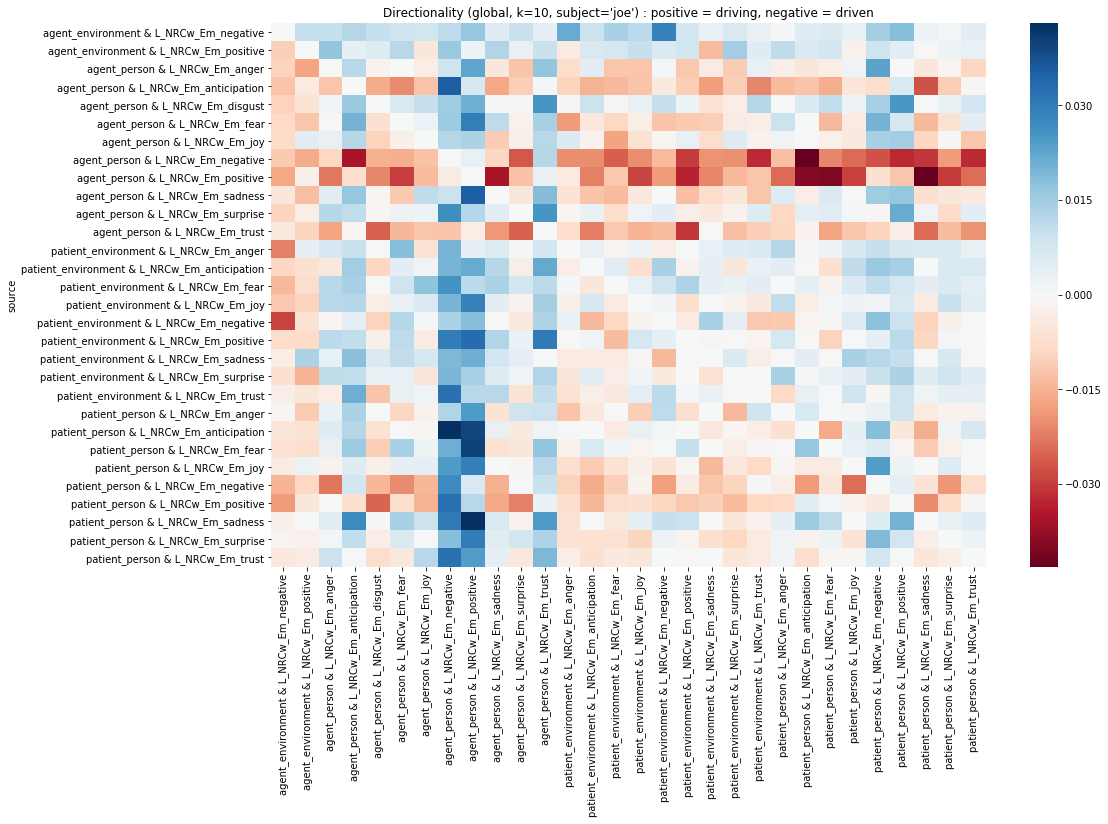

In [507]:
sns.heatmap((T - T.T), annot=False, cmap='RdBu')#, fmt="d")
plt.title(f"Directionality (global, k={k}, subject={subject!r}) : positive = driving, negative = driven")
plt.show()

In [520]:
from pyinform import blockentropy as be
def get_block_entropies(casc, cols, kmax=10):
    n = len(casc.index)
    
    data = []
    for k in range(1, kmax):
        for c in cols:
            benk = be.block_entropy(casc[c], k=k)
            data.append({'k': k, 'cascade': c, 'block_entropy_k': benk})
    
    return pd.DataFrame(data)

block_entrs = get_block_entropies(higher_casc, all_cols, kmax=30)

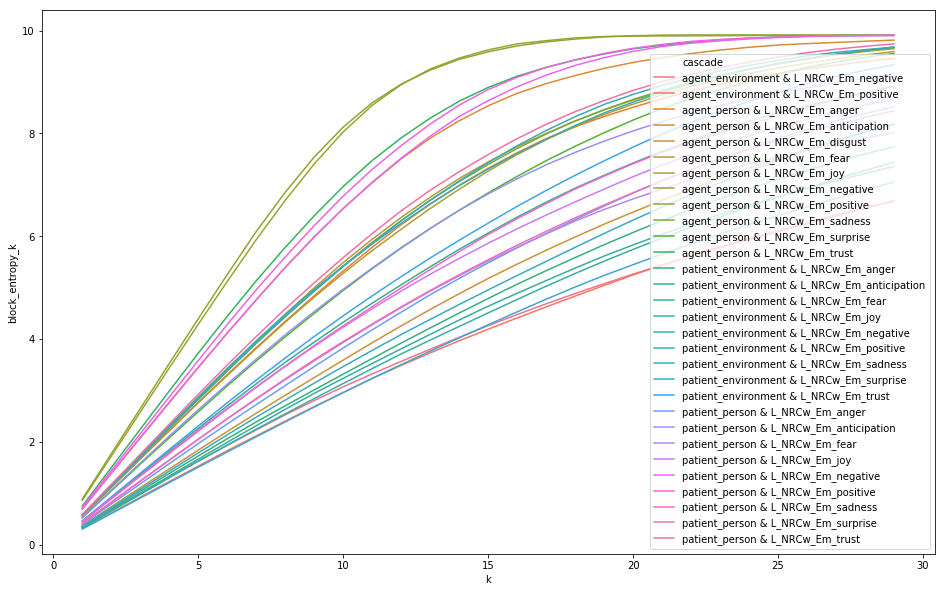

In [521]:
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='cascade')
plt.show()

In [ ]:
block_entrs['d1'] = block_entrs.block_entropy_k.diff()
block_entrs[['e','f']] = block_entrs.cascade.str.split(' & ',expand=True)
#block_entrs['f'] = block_entrs.cascade.str.split(' & ')[1]

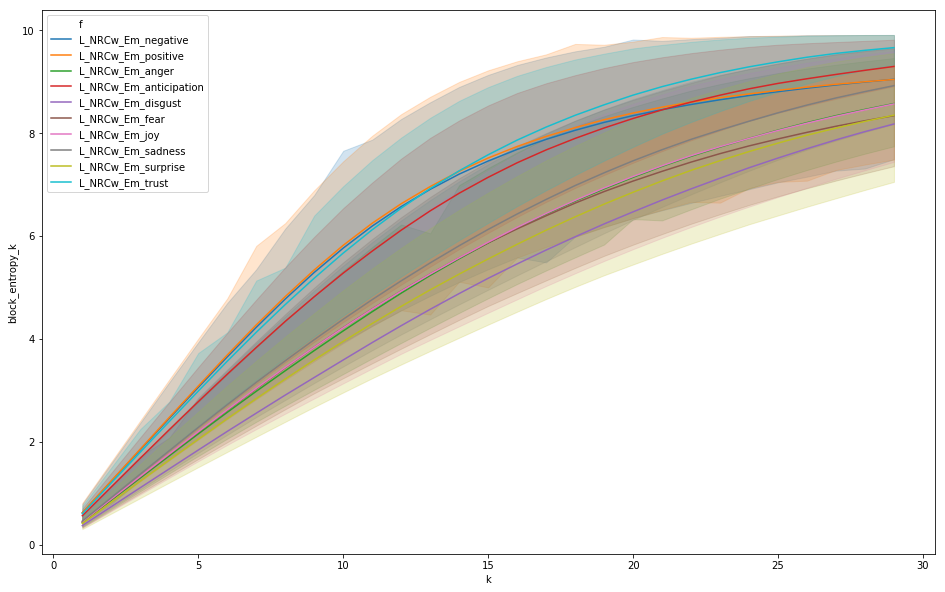

In [529]:
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='f')
plt.show()

In [477]:
sns.choose_colorbrewer_palette?

In [ ]:
Now with combinations of entity category and information token (only those that occur > 50 times). It's a bit hard to interpret at this point, especially since I have no method to select the appropriate k and the transfer entropy values are pretty low (< .005), but there does seem to be some regularities, e.g negative/positive seem to be clearly driving when occurring as agent_person, not so much when occurring as agent_environment. But most cascade occur only about 100 times here so I should probably not give too much value to those results.